In [1]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [12]:
employee_df = pd.read_csv('../data/employee-data.csv')
employee_df.head(15)

,DATE,SMU08197402023600001
0,1990-01-01,6.0
1,1990-02-01,5.9
2,1990-03-01,5.8
3,1990-04-01,5.9
4,1990-05-01,6.0
5,1990-06-01,6.2
6,1990-07-01,6.3
7,1990-08-01,6.5
8,1990-09-01,6.3
9,1990-10-01,6.4


Numbers of employees in Construction in the Denver Metro area by the thousands

In [40]:
req = requests.get('https://opendata.arcgis.com/datasets/771d1afd5c6943c6a5bbbdfba4cadc53_7.geojson')
benchmark_df = pd.read_json(req.text)
benchmark_df['features'].head(15)

0     {'type': 'Feature', 'properties': {'URL': 'htt...
1     {'type': 'Feature', 'properties': {'URL': 'htt...
2     {'type': 'Feature', 'properties': {'URL': 'htt...
3     {'type': 'Feature', 'properties': {'URL': 'htt...
4     {'type': 'Feature', 'properties': {'URL': 'htt...
5     {'type': 'Feature', 'properties': {'URL': 'htt...
6     {'type': 'Feature', 'properties': {'URL': 'htt...
7     {'type': 'Feature', 'properties': {'URL': 'htt...
8     {'type': 'Feature', 'properties': {'URL': 'htt...
9     {'type': 'Feature', 'properties': {'URL': 'htt...
10    {'type': 'Feature', 'properties': {'URL': 'htt...
11    {'type': 'Feature', 'properties': {'URL': 'htt...
12    {'type': 'Feature', 'properties': {'URL': 'htt...
13    {'type': 'Feature', 'properties': {'URL': 'htt...
14    {'type': 'Feature', 'properties': {'URL': 'htt...
Name: features, dtype: object

In [38]:
features_df = benchmark_df['features']
type(features_df)

pandas.core.series.Series

In [30]:
features_df.describe

<bound method NDFrame.describe of 0       {'type': 'Feature', 'properties': {'URL': 'htt...
1       {'type': 'Feature', 'properties': {'URL': 'htt...
2       {'type': 'Feature', 'properties': {'URL': 'htt...
3       {'type': 'Feature', 'properties': {'URL': 'htt...
4       {'type': 'Feature', 'properties': {'URL': 'htt...
5       {'type': 'Feature', 'properties': {'URL': 'htt...
6       {'type': 'Feature', 'properties': {'URL': 'htt...
7       {'type': 'Feature', 'properties': {'URL': 'htt...
8       {'type': 'Feature', 'properties': {'URL': 'htt...
9       {'type': 'Feature', 'properties': {'URL': 'htt...
10      {'type': 'Feature', 'properties': {'URL': 'htt...
11      {'type': 'Feature', 'properties': {'URL': 'htt...
12      {'type': 'Feature', 'properties': {'URL': 'htt...
13      {'type': 'Feature', 'properties': {'URL': 'htt...
14      {'type': 'Feature', 'properties': {'URL': 'htt...
15      {'type': 'Feature', 'properties': {'URL': 'htt...
16      {'type': 'Feature', 'propertie

In [45]:
# Displaying all the main features in data set
benchmark_df['features'][0]['properties']

{'URL': 'https://apps2.auroragov.org/publicdocuments/ViewDocument.aspx?c=RUO7SJt48Is%3d',
 'OBJECTID': 9167,
 'COA_ID': '3S6330SW002',
 'ELEV_FT': 5495.314,
 'BENCHMARK_ID': '43-017',
 'AKA': '* SM-210.2',
 'STREET': 'SCHUMAKER',
 'DESCRIP': '3.5" DIAM. BRASS CAP U.S.C.&G.S. ATOP A CONC. BLOCK LABELED "F-259 1938", SD. MON. BEING 52 FT. S. OF C.L. UPRR TRACK & 9 FT. M/L W. OF UPRR MILE POST 612, SD. MON. ALSO BEING 0.1 MILE E. OF SCHUMAKER RD. EXT. AURORA DATUM MAY NOT AGREE WITH USC&GS. AKA SM-210.2.',
 'GIS_PLATPAGE': '02AU',
 'MONUMENT_TYPE': 'BC'}

In [52]:
price_index_df = pd.read_csv('../data/Producer-Price-Index.csv')
price_index_df

,DATE,PCU44414441
0,2003-12-01,100.0
1,2004-01-01,102.5
2,2004-02-01,104.1
3,2004-03-01,105.1
4,2004-04-01,108.6
5,2004-05-01,107.7
6,2004-06-01,108.7
7,2004-07-01,113.1
8,2004-08-01,112.5
9,2004-09-01,115.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea6f192518>]],
      dtype=object)

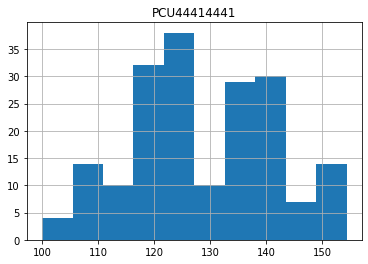

In [51]:
price_index_df.hist()

In [60]:
price_index_df['date'] = price_index_df['DATE'].astype('datetime64').astype(int).astype(float)
price_index_df.head(5)

,DATE,PCU44414441,date
0,2003-12-01,100.0,1.070237e+18
1,2004-01-01,102.5,1.072915e+18
2,2004-02-01,104.1,1.075594e+18
3,2004-03-01,105.1,1.078099e+18
4,2004-04-01,108.6,1.080778e+18


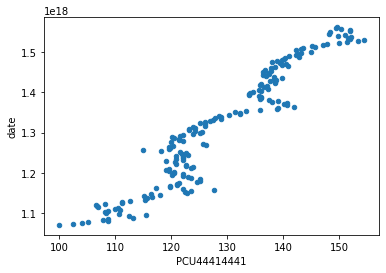

In [61]:
price_index_df.plot.scatter(x='PCU44414441', y='date')

In [67]:
national_house_df = pd.read_csv('../data/national_house.csv')
national_house_df

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
5,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
6,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
7,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
8,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
9,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN


In [68]:
national_house_df.columns

Index(['Unnamed: 0', 'NATIONAL HOUSE CONSTRUCTION COST INDEX', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [9]:
pp_df = pd.read_excel('../data/ParkPlace_ForecastingModel.xlsx', sheetname='Sheet1')
pp_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/ParkPlace_ForecastingModel.xlsx'

In [12]:
parkplace_df = pd.read_csv('../data/ParkPlace_Forecasting_Model.csv')
parkplace_df

,Unnamed: 0,Forecasting Model,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,CONSTRUCTION COST ESTIMATE,NaN,NaN,NaN,NaN
1,NaN,PROJECT INFORMATION:,NaN,FLOOR AREA & Budget,NaN,NaN
2,NaN,Project:,2256 Curtis St. Park Place Condos),16816,Garage Area,NaN
3,NaN,Drawing Date:,12/21/2018,42468,Residential & Common Area,NaN
4,NaN,Estimate Date:,NaN,59284,Gross Square Footage,NaN
5,NaN,Designer:,EV Studio,0,Price per SF Residential Net,NaN
6,NaN,NaN,NaN,0,Price per SF Total Gross,NaN
7,NaN,TARGET BUDGET,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,HARD COST SUMMARY,NaN,NaN,NaN,NaN


In [13]:
estimate5_df = pd.read_csv('../data/5-Estimate_FINAL.csv')
estimate5_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,PROJECT INFORMATION,NaN,NaN,NaN


In [14]:
est_concept_df = pd.read_csv('../data/Estimate_CONCEPT.csv')
est_concept_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,PROJECT INFORMATION,NaN,NaN,NaN


In [15]:
est_total_df = pd.read_csv('../data/Estimate_Program_Total.csv')
est_total_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,PROJECT INFORMATION,NaN,NaN,NaN
